In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("alzheimers_disease_data.csv")

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

## There is no missing data so we can start 

## ------------------------------------------------------------------------

## Now we have to check for the balance between classes

In [5]:
df['Diagnosis'].value_counts()

0    1389
1     760
Name: Diagnosis, dtype: int64

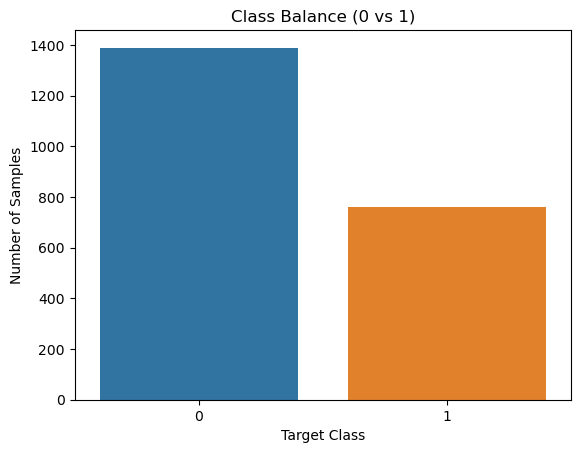

In [6]:
import seaborn as sns
sns.countplot(x='Diagnosis', data=df)
plt.title('Class Balance (0 vs 1)')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
plt.show()

## As we can clearly see it's like 65% to 35% so no need for modification

## ------------------------------------------------------------------------

## Let's proceed with standardizing the features of our unlabelled data

In [7]:
from sklearn.preprocessing import  StandardScaler
columns = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']
standard_scaler = StandardScaler()
df[columns] = standard_scaler.fit_transform(df[columns])

In [8]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,...,0,0,-1.104434,0,0,0,1,0,0,XXXConfid
1,4752,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,...,0,0,-0.810601,0,0,0,0,1,0,XXXConfid
2,4753,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,...,0,0,0.724491,0,1,0,1,0,0,XXXConfid
3,4754,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,...,0,1,0.508044,0,0,0,0,0,0,XXXConfid
4,4755,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,...,0,0,-1.684679,0,0,1,1,0,0,XXXConfid


## Now each feature have the mead of 1 and standard deviation of 1 

### That would help improving numerical stability

## ------------------------------------------------------------------------

## Taking a quick look at the dataset we can see that we have four features only about cholesterol

## We will make a correlation matrix to see if we can do combination , deleting or adding 

In [9]:
cholesterol_features = ['CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
correlation_matrix = df[cholesterol_features].corr()

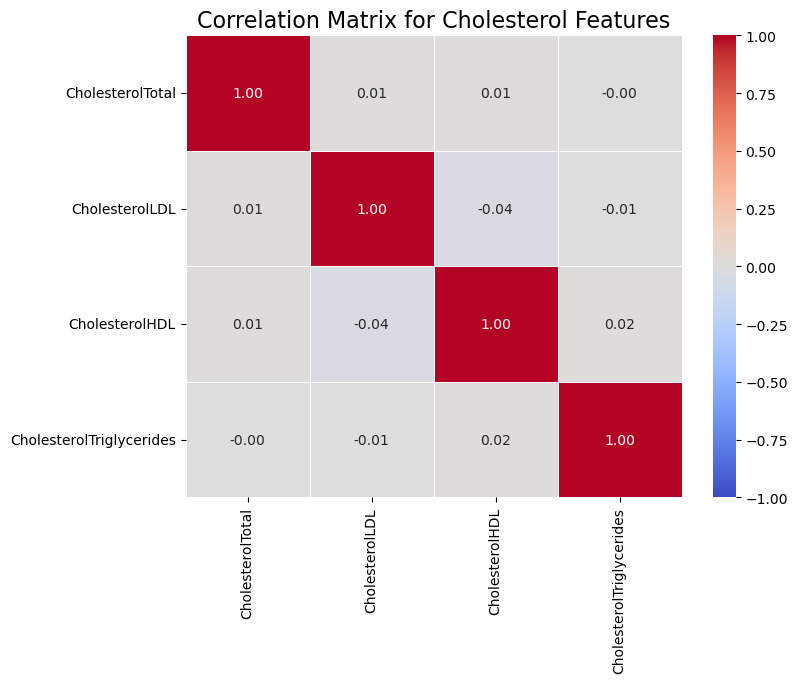

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Cholesterol Features', fontsize=16)
plt.show()

## As we can clearly see the correlation coefficients are too small so we cannot do any operations of the ones we had mentioned before as every feature would affect the prediction

## ------------------------------------------------------------------------

## Now we can start splitting the data

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Diagnosis','PatientID','DoctorInCharge']) 
y = df['Diagnosis'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ------------------------------------------------------------------------

## Now the model initialization

In [18]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

## Fitting the model to the training data

In [21]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

## ------------------------------------------------------------------------

## Now let's do the predections

In [22]:
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
accuracy

0.9488372093023256

## Now it is a very good score but we will try to improve it using GridSearch

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0]
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                           param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 1.0]})

## Getting the best model of those the grid search made for us

In [24]:
best_xgb_model = grid_search.best_estimator_

In [25]:
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best_xgb)
accuracy

0.9511627906976744

## Now this is very good actually 

## Although additional tuning isn't required, reviewing the confusion matrix and XGBoost's feature importance plot will provide valuable insights into the model's performance

## 1-confusion matrix

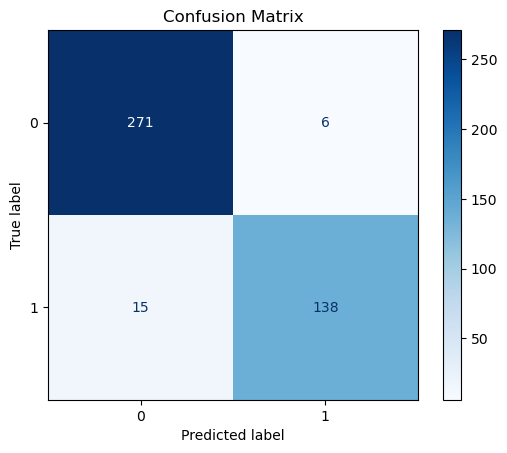

In [28]:
cm = confusion_matrix(y_test, y_pred_best_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

## The model performed very well across both classes, despite the slight imbalance in their respective counts

## 2-XGBoost's feature importance

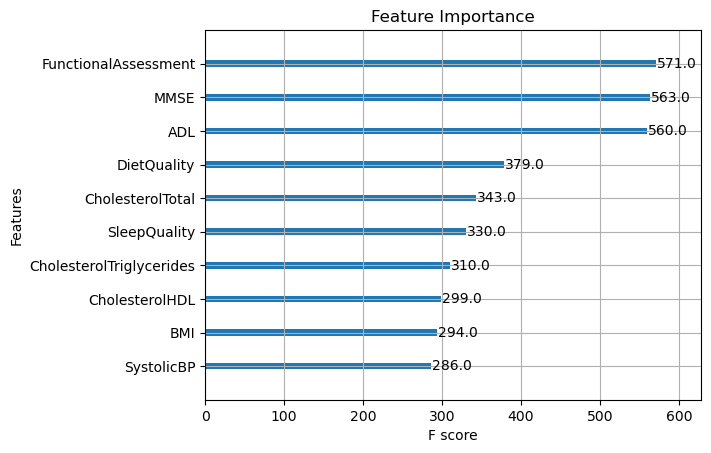

In [29]:
xgb.plot_importance(best_xgb_model.get_booster(), importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.show()

## In summary, the model demonstrates strong performance despite a slight class imbalance, effectively distinguishing between the classes as shown by the confusion matrix. The feature importance analysis highlights the key predictors driving the model's decisions, offering valuable insights into the underlying factors influencing outcomes. These results suggest that the current feature set is robust, and the model is well-tuned for the task at hand